# Exploratory Data Visualization

The domain of data science combines facets of mathematics, statistics in particular, with computer science and industry- or domain-specific knowledge.

## Data science pipeline

![Data science pipeline](./image/FancyWM_qRe6d2hvFA.png)

Inside Airbnb collects Airbnb data to help support policies and quantify the impact of short-term housing rentals on residential communities.

You can visit Inside Airbnb’s website (http://insideairbnb.com/get-the-data) and download the data, which is licensed under a CC 4.0 international license. Once on the website, scroll down or search for New York City and download the listings.csv.gz dataset. Inside Airbnb only stores a rolling 12 months of data, so your results may vary depending upon when you run the analysis.

In [2]:
# Importing the requisite packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal
import splot

Next, you’ll import the data and begin to understand the columns in the dataset by running the following code:

In [6]:
### Setting the file path
data_path = "D:/summer_DSI/gitsites/Applied-Geospatial-Data-Science-with-Python/data_rest/Data_pt1/"

In [7]:
# Reading in the data - REMINDER: You'll need to download this data yourself from InsideAirbnb
listings = pd.read_csv(data_path + 'listings.csv.gz', compression='gzip')

C:\Users\parma\AppData\Local\Temp\ipykernel_42868\3061853916.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv(data_path + 'listings.csv.gz', compression='gzip')


## Exploratory Data Analysis

To better understand the columns, it’s helpful to look at the data dictionary for variable definitions. Inside Airbnb’s data dictionary can be found here: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896.

In [8]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
# Subsetting the data

listings_sub = listings[['id','property_type','neighbourhood_cleansed', 'neighbourhood_group_cleansed','beds','bathrooms', 'price','latitude','longitude']]

listings_sub.head()

,id,property_type,neighbourhood_cleansed,neighbourhood_group_cleansed,beds,bathrooms,price,latitude,longitude
0,801749842377802394,Private room in home,Canarsie,Brooklyn,1.0,NaN,$143.00,40.640403,-73.888535
1,765948794133787266,Private room in rental unit,Canarsie,Brooklyn,1.0,NaN,$30.00,40.648510,-73.894330
2,636274456676328779,Entire villa,Tottenville,Staten Island,2.0,NaN,$157.00,40.507114,-74.251907
3,768125251187660469,Private room in home,Sheepshead Bay,Brooklyn,1.0,NaN,$89.00,40.583490,-73.959880
4,49248255,Entire rental unit,North Riverdale,Bronx,2.0,NaN,$125.00,40.903260,-73.907090


Running this method reveals that there are 37,410 records in the dataset. It also reveals 910 missing records for bedrooms and 37,410 missing records for the bathrooms variable.

In [10]:
listings_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            42931 non-null  int64  
 1   property_type                 42931 non-null  object 
 2   neighbourhood_cleansed        42931 non-null  object 
 3   neighbourhood_group_cleansed  42931 non-null  object 
 4   beds                          42002 non-null  float64
 5   bathrooms                     0 non-null      float64
 6   price                         42931 non-null  object 
 7   latitude                      42931 non-null  float64
 8   longitude                     42931 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.9+ MB


Given that there is no obvious way to impute the missing values here, we’ll go ahead and drop them by using the .drop() method. By specifying the inplace=True parameter, you can drop the records from the original DataFrame without having to create a new DataFrame object:
the price variable is stored as an object. In order to perform computations on this column, you’ll need to convert it to a float:

In [11]:
# Cleaning the data
listings_sub.drop(columns=['beds','bathrooms'], inplace=True)
listings_sub["price"] = listings_sub["price"].replace("[$,]", "", regex=True).astype(float)

C:\Users\parma\AppData\Local\Temp\ipykernel_42868\1502043748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_sub.drop(columns=['beds','bathrooms'], inplace=True)
C:\Users\parma\AppData\Local\Temp\ipykernel_42868\1502043748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_sub["price"] = listings_sub["price"].replace("[$,]", "", regex=True).astype(float)


In this section, you’ve cleansed the data in the following ways:

You dropped variables that had a high number of missing values that could not be imputed in a logical way
You corrected the data type of the price variable, converting it from a string to a float type allowing for future computation

In [12]:
listings_sub

,id,property_type,neighbourhood_cleansed,neighbourhood_group_cleansed,price,latitude,longitude
0,801749842377802394,Private room in home,Canarsie,Brooklyn,143.0,40.640403,-73.888535
1,765948794133787266,Private room in rental unit,Canarsie,Brooklyn,30.0,40.648510,-73.894330
2,636274456676328779,Entire villa,Tottenville,Staten Island,157.0,40.507114,-74.251907
3,768125251187660469,Private room in home,Sheepshead Bay,Brooklyn,89.0,40.583490,-73.959880
4,49248255,Entire rental unit,North Riverdale,Bronx,125.0,40.903260,-73.907090
...,...,...,...,...,...,...,...
42926,40342902,Private room in rental unit,East Village,Manhattan,85.0,40.726110,-73.988010
42927,35257699,Entire rental unit,Hell's Kitchen,Manhattan,208.0,40.762150,-73.990270
42928,52491515,Entire rental unit,Lower East Side,Manhattan,125.0,40.717330,-73.991110
42929,48158801,Private room in loft,Bushwick,Brooklyn,50.0,40.687350,-73.917660


Now that the data is cleaned, let’s look at the overall distribution of the price variable. First, you’ll run the .describe() method on the DataFrame

In [13]:
listings_sub['price'].describe()

count    42931.000000
mean       200.307167
std        895.082911
min          0.000000
25%         75.000000
50%        125.000000
75%        200.000000
max      99000.000000
Name: price, dtype: float64

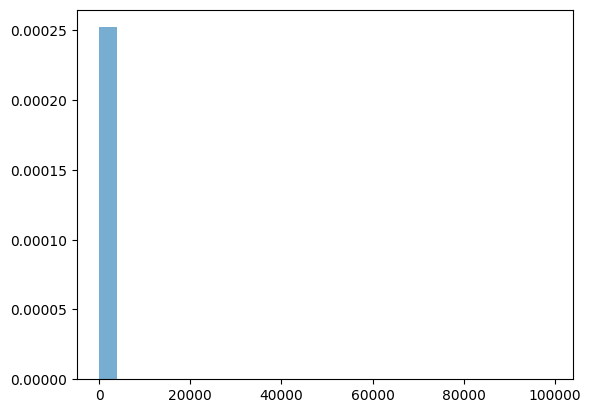

In [14]:
%matplotlib inline
plt.hist(listings_sub['price'], bins=25, density=True, alpha=0.6)
plt.show()

Based on this output, you can see mean nightly price for Airbnbs in New York City is $190.78. The maximum nightly price is $12,900. Based on this information, you can start to understand that the data is skewed. To visually represent this skewness, you can plot a histogram with a kernel density estimation. To do that, you’ll run the following code:

C:\Users\parma\AppData\Local\Temp\ipykernel_42868\87770122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings_sub['price'], kde=True)


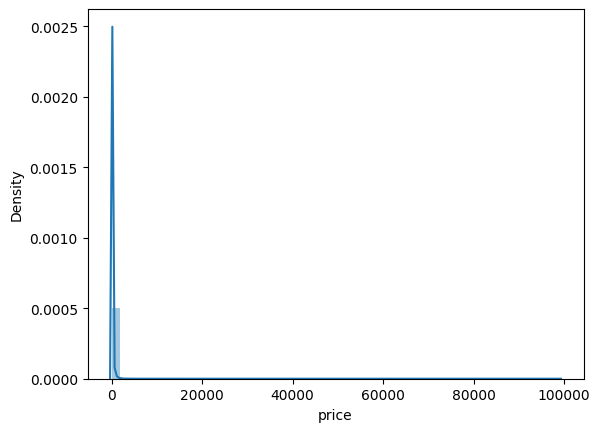

In [15]:
import seaborn as sns
sns.distplot(listings_sub['price'], kde=True)
plt.show()

## Exploratory Spatial Data Analysis
To begin ESDA, you’ll first need to convert the pandas DataFrame holding the New York City Airbnb prices into a GeoPandas DataFrame. You’ll also want to set its CRS to 4326. By checking the data dictionary, you can see that description of the latitude and longitude variables states “Uses the World Geodetic System (WGS84) projection for latitude and longitude”. This confirms that 4326 is the appropriate CRS for this analysis.

In [16]:
# Convert the pandas dataframe to a geopandas dataframe
listings_sub_gpd = gpd.GeoDataFrame(listings_sub, geometry=gpd.points_from_xy(listings_sub.longitude, listings_sub.latitude, crs=4326))

Now that the data is stored as a GeoPandas DataFrame, you can easily plot the observations as a point map. A point map uses the latitude and longitude of observations to visualize Airbnb locations on a map.

In [ ]:
import geoplot.crs as gcrs
import geoplot as gplt
ax = gplt.webmap(listings_sub_gpd,projection=gcrs.WebMercator())
gplt.pointplot(listings_sub_gpd, ax=ax)

This point map is not highly informative, but it does give you a general sense of the geography from which the data is derived. To start creating better visualizations, let’s first convert the point map into a heatmap. A heatmap is a spatial visualization that allows you to see the density of points in an area as a raster. To do this, we’ll first start by getting Tracts and CBSA boundary and reading in a shapefile associated with New York City’s five boroughs:

In [19]:
# Reading in the New York Census Tracts
#NY_tracts_path = "https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_36_tract.zip"
#NY_Tracts = gpd.read_file(NY_tracts_path)
#NY_Tracts = NY_Tracts.to_crs(4326)

# Subsetting the census tracts to those in the New York CBSA
#cbsa_path = 'https://www2.census.gov/geo/tiger/TIGER2021/CBSA/tl_2021_us_cbsa.zip'
#cbsas = gpd.read_file(cbsa_path)
#NY_cbsa = cbsas[cbsas['GEOID']=='35620']

<Axes: >

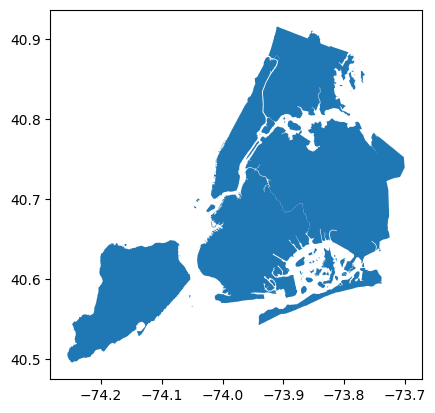

In [20]:
# Borough Boundaries
Boroughs = gpd.read_file(data_path + r"NYC Boroughs\nybb_22a\nybb.shp")
Boroughs = Boroughs.to_crs(4326)
Boroughs.plot()

the highest number of Airbnbs are located in Manhattan and Brooklyn:

In [ ]:
# Creating a heatmap of Airbnb locations

# Creating a heatmap raster from the points
ax = gplt.kdeplot(
    listings_sub_gpd,shade=True, cmap='Reds',
    clip=Boroughs.geometry,
    projection=gcrs.WebMercator())

# Plotting the heatmap on top of the boroughs for context
gplt.polyplot(Boroughs, ax=ax, zorder=1)

In this section, you learned about two new types of maps: a point map and a heatmap, both of which were derived from the raw latitude and longitude of the Airbnb locations. In the next section, you’ll aggregate these points up to higher-order geographies.
Converting from point maps to census tract maps
Next, to make the data easier to work with, let’s aggregate it up to the census tract level and take the average price of the listings that fall within each census tract. To do that, you’ll follow the next few steps:


In [22]:
# Reading in the New York Census Tracts
NY_tracts_path = "https://www2.census.gov/geo/tiger/TIGER2021/TRACT/tl_2021_36_tract.zip"
NY_Tracts = gpd.read_file(NY_tracts_path)
NY_Tracts = NY_Tracts.to_crs(4326)

# Subsetting the census tracts to those in the New York CBSA
cbsa_path = 'https://www2.census.gov/geo/tiger/TIGER2021/CBSA/tl_2021_us_cbsa.zip'
cbsas = gpd.read_file(cbsa_path)
NY_cbsa = cbsas[cbsas['GEOID']=='35620']

mask = NY_Tracts.intersects(NY_cbsa.loc[620,'geometry'])
NY_Tracts_subset = NY_Tracts.loc[mask]

# Aggregating the airbnb locations to the NY census tracts
NY_Tracts_sj = gpd.sjoin(NY_Tracts_subset, listings_sub_gpd, how='left', op='contains')
NY_Tracts_sj = NY_Tracts_sj[['GEOID','price','geometry']]
NY_Tracts_Agg = NY_Tracts_sj.dissolve(by='GEOID', aggfunc='mean')

NY_Tracts_Agg

D:\summer_DSI\dsi_venv\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,geometry,price
GEOID,,
36005000100,"POLYGON ((-73.89772 40.79514, -73.89611 40.796...",NaN
36005000200,"POLYGON ((-73.86222 40.81003, -73.86115 40.811...",70.833333
36005000400,"POLYGON ((-73.85552 40.81583, -73.85472 40.815...",101.166667
36005001600,"POLYGON ((-73.86153 40.81938, -73.86203 40.821...",124.666667
36005001901,"POLYGON ((-73.92944 40.80938, -73.92933 40.809...",138.000000
...,...,...
36119981000,"POLYGON ((-73.82881 41.08166, -73.82844 41.081...",NaN
36119982000,"POLYGON ((-73.87180 41.15252, -73.87169 41.152...",NaN
36119983000,"POLYGON ((-73.68541 41.23799, -73.68448 41.239...",NaN


In [ ]:
gplt.choropleth(NY_Tracts_Agg, hue="price", cmap="Greens", figsize=(60,30), legend=True)

we can see that there are a large number of census tracts that do not have any information and therefore are not shaded. This makes it hard to identify the area of interest, which is New York City. Due to there being numerous census tracts without listing information, it is better to produce an interactive map that will allow you, or your end user, to zoom in on areas of interest. You can use the geoviews package with the bokeh extension for this:

In [ ]:
import geoviews
geoviews.extension("bokeh")

choropleth = geoviews.Polygons(data=NY_Tracts_Agg, vdims=["price","GEOID"])

choropleth.opts(height=600, width=900, title="NYC Airbnb Price",
                tools=["hover"], cmap="Greens", colorbar=True, colorbar_position="bottom")

Based on the distribution and choropleth visualizations, you now know that there is a long right-hand skew to the average nightly prices for Airbnbs in New York City. To make your visualization a bit more dynamic, let’s drop any outliers that are more than one standard deviation away from the mean New York City Airbnb price and then replot the data.

## Producing maps without outliers
To produce a map that removes observations greater than one standard deviation from the mean, follow the next few steps:
1.	First, let’s import the statistics package and calculate the mean and standard deviation of the nightly Airbnb price:


In [ ]:
import statistics

# Calculating the mean and standard deviation
mean_price = statistics.mean(NY_Tracts_Agg['price'].dropna())
stdev = statistics.stdev(NY_Tracts_Agg['price'].dropna())

print("The mean Airbnb price is: % s " % (round(mean_price, 2)))
print("The standard deviation of Airbnb prices is: % s " % (round(stdev, 2)))

# Droping records that are more than 1 standard deviation from the mean
NY_Tracts_Agg_filtered = NY_Tracts_Agg[NY_Tracts_Agg['price'] < mean_price+stdev]

choropleth = geoviews.Polygons(data=NY_Tracts_Agg_filtered, vdims=["price","GEOID"])

choropleth.opts(height=600, width=900, title="NYC Airbnb Price",
                tools=["hover"], cmap="Greens", colorbar=True, colorbar_position="bottom")

After running the code, you will have a new dataset called NY_Tracts_Agg_filtered where you have removed any observation greater than one standard deviation away from the mean. After removing census tracts with no observations, the dataset has a mean nightly price of $154.64 and a standard deviation of $190.02.

After reviewing the results of the heatmap and the final choropleth map, you began to notice some patterns in the data as it relates to its geographic distribution. You noticed that the highest number of Airbnbs are located in Manhattan and Brooklyn. You also noticed that there was a pattern where certain census tracts were grouped together with higher prices.